<a href="https://colab.research.google.com/github/hcantekin/hcantekin.github.io/blob/main/The_Green_Solow_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Green Solow Model

In this notebook you will look at a simple integrated assessment model based on a Solow Growth Model. 

The aim of the notebook is to introduce you to the flavour of integrated assessment models, see how growth and environmental emissions might be linked and explore how abatement may counteract environmental degradation of productive activity. 

The notebook is interactive in the sense that it has questions and activities throughout which you should work through. Double-click into an answer cell to type your notes and answers. 

For our Python Simulations we should first load several packages we will need for calculations and plotting. Note, loading these may take a bit, so wait till the code is fully run. Also, when you use the code for the first time, you will need to run this first box twice. 

_Code-guide: We first load various packages which python needs to make calculations and produce graphs._

In [12]:
import sympy as sym
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 450
import matplotlib.pyplot as plt
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Basic dynamics of a Green Solow-Swan model

Folowing the paper by Brock & Taylor (2010), the basic green solow model links capital investment and growth with emissions. What we are interested in are the transitional dynamics from one steady state to a new steady state. The dynamics of the capital stock and emissions in the model can be described as follows:
$$ K_{t+1} - K_{t} = s F(K_t,L_t)(1-\theta_t)-dK_t \\ E_t = F(K_t,L_t)\times\Omega_t\times a(\theta_t)$$

The first equation captures growth of capital and is the same as in the standard solow growth model, except for the fact that each period a fraction $\theta_t$, where $0 < \theta_t < 1$, of output (GDP) is invested into abatement of pollution emissions $E_t$.  Hence, available GDP for capital investment is lower. This abatement could be in the form of paying for damages to be restored, or investing to prevent damages.

**Per capita equations**

Following Brock & Taylor (2010), we are interested in per capita changes. This is to factor out the effect of population growth. Using a production function with constant returns-to-scales (that is $ F(\lambda K, \lambda L) = \lambda F(K,L)$ with $\lambda = 1/L_t$), we get $ F(\frac{K_t}{L_t}, 1) = \frac{1}{L_t}F(K_t,L_t), $ and can rewrite this equation using $k_t = \frac{K_t}{L_t}$ to get $ K_{t+1} - K_{t} = L_t(sF(k_t,1)(1-\theta_t)-dk_t)$ and $ E_t = L_t \times F(k_t,1) \times \Omega_t \times a(\theta_t)$. Furthermore we can rewrite $ \frac{K_{t+1}-K_t}{L_t} \approx k_{t+1} - k_t + k_t\times n_t $ and organise the equations as
$$ k_{t+1} - k_t - nk_t =sF(k_t,1)(1-\theta_t)-dk_t \\ e_t = F(k_t,1) \times \Omega_t \times a(\theta_t) \\ L_{t+1} - L_t = n_t \times L_t$$

**Abatement Effort & Efficiency of that effort**

Per capita emission $e_t$ relates to the total output of the economy via two factors: an environmental technology factor $\Omega_t$ and a factor $a(\theta)$ that models the reduction in polluting emissions that are the result of the abatement effort.

**Student Task:**
Think of real world examples what $\Omega_t$ and $a(\theta)$ may represent. Do you see any limitations in modelling abatement in this way?

  
  Ω : environmetnal technology factor. e.g. electric cars.  Omega = captures carbon intensity of output. usually fixed as a baseline.  
  𝑎(𝜃): models the reduction in polluting emissions, result of abatement effort. Abatement also includes paying for damages to be restored which is not preventing pollution...
  a is funtion of pheta, an abatement function, a can be between 0 and 1. 
  = proportion of output invested in abatement tech/ output. so reduction in carbon intensity, can help predicy carbon intensity in future, whereas omega is current (initial state). additional investment in abatement (reduce level of emissions per unit of output). if a is getting smaller, emissions are getting smaller. 
its per capita to adjust for population growth, but is this sensible? real world context, population growth could be significant. 






**Specifing abatement effort and efficiency of that effort**

A typical relationship between abatement effort and reduction in poluting emissions is $$a(\theta) = (1 - \theta)^\xi,$$ $\xi$ in $\{1, \infty\}$ and $\theta$ in $\{0,1\}$. We can plot the relationship between abatement effort and the reduction in emissions.

_Code Guide_

1. We define a function in Python with $\xi$ as input. 
2. The output is a set of relationships between $\theta$ and $a(\theta)$,  which depending on the chosen value of $\xi$;
2. We look at two equations, for $\xi=4$ and $\xi=2$ and name the output they yield for different levels of $\theta$ $a1$ and $a2$;
3. We plot using the command `plt.plot()`

In [13]:
# Plot the relationship between abatement effort and efficiency of that effort

def efficiency_of_abatement_effort(xi:float):
    theta = np.linspace(0, 1, num = 100) # theta is abatement effort
    a = (1-theta)** xi
    return theta, a

theta, a1 = efficiency_of_abatement_effort(xi = 4)
theta, a2 = efficiency_of_abatement_effort(xi = 2)

plt.plot(theta, a1, 'b', label='xi = 4')
plt.plot(theta, a2, 'r', label='xi = 2')
plt.legend()
plt.ylabel('a(theta)')
plt.xlabel('theta')
plt.title('Efficiency of Abatement Effort')
plt.show()

ImportError: ignored

<Figure size 432x288 with 1 Axes>

**Student Task**
Explain in your own words how abatement differs in the above cases. Can you think of real worl examples which would show the same differences?


**Student Answer**
Blue is more efficient as emissions reduce faster... because xi is bigger.
xi is an efficiency parameter... so big is more efficicent. captures how efficiently using finds to reduce emissions. SO, if bigger then same amount of money will more effectively reduce emissions. will vary in different countries? 
if a is decereasing quickly with small levels of pheta, its more efficient... pheta is investment in abatement tech. 
can see diminishing returns in slope of curves.
lower levels of a means less emissions. 
if highly efficient, dont need to invest much in abatement technology to see impressive reduction. 
xi between 0 and 1 is 'just for fun', because creates downward curve which goes against diminishing returns. 

**Student Task: Try it yourself**
Below, change the parameter $\xi$ to different values of your choice. Explain intuitively how this changes the relationship between $\theta$ and $a(\theta)$. Find real world examples and explanations which may match different parameterisations. Make sure you include large values of $\xi$. What would happen if you would relax the restriction $\xi$ in $\{1, \infty\}$ and allow for values between 0 and 1? Intuituitively explain. Could you think of a real world scenario where this would be appropriate?

In [2]:
# plot the relationship between abatement effort and efficiency of that effort

def efficiency_of_abatement_effort(xi:float):
    theta = np.linspace(0, 1, num = 100) # theta is abatement effort
    a = (1-theta)** xi
    return theta, a

# CHANGE PARAMTER xi HERE: # 
theta, a1 = efficiency_of_abatement_effort(xi = 10)
theta, a2 = efficiency_of_abatement_effort(xi = 6)

# CHANGE THE LABEL FOR YOUR GRAPHS HERE: # 
plt.plot(theta, a1, 'b', label='xi = 10')
plt.plot(theta, a2, 'r', label='xi = 6')
plt.legend()
plt.ylabel('a(theta)')
plt.xlabel('theta')
plt.title('Efficiency of Abatement Effort')
plt.show()

ImportError: ignored

<Figure size 432x288 with 1 Axes>

**Student Answer:**
(click into this cell and type your answer)
    
    
    
    
    

**Green Technology**

In addition to $a(\theta)$ the level of green technology used in production $\Omega_t$ impacts total emissions. In our model $\Omega_t$ is given by $\Omega_t = (1 - \omega)^t$, and changes over time. 

_Code-Guide_
1. We generate a python function with $\omega$ as input
2. The output is a set of $\Omega$ for different values of $\omega$.
3. choose different $\omega$, and output $\Omega$ based on $\omega$
4. name $\Omega$
5. plot

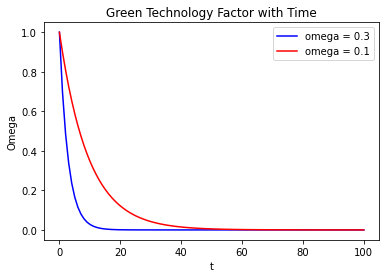

In [ ]:
# plot the relationship between abatement effort and efficiency of that effort

# define function
def green_technology_factor(omega:float):
    t = np.linspace(0, 100, num = 100) # theta is abatement effort
    Omega = (1-omega)**t
    return t, Omega

# set parameters
t, Omega1 = green_technology_factor(omega = 0.3) # omega is between 0 and 1
t, Omega2 = green_technology_factor(omega = 0.1)

# plot the relationship between unknowns
plt.plot(t, Omega1, 'b', label='omega = 0.3')
plt.plot(t, Omega2, 'r', label='omega = 0.1')
plt.legend()
plt.ylabel('Omega')
plt.xlabel('t')
plt.title('Green Technology Factor with Time')
plt.show()

**Student Task**
Explain in your own words how abatement differs in the above cases. Can you think of real worl examples which would show the same differences?


**Student Answer**
green tech declining over time?
even without abatement tech, carbon inesntiy is going down becasue of policy.
little omega (w) is similar to pheta, but initial, a prameter in baseline investemnt in carbon tech (between 0 and 1 as proportion).
a is similar to big omega becasue both Y in grpahical function. 
litte omega and xi is x in graph function.
big omega captures the carbon intensity so decline over time is reducing emissions. 
so higher little omega (w) means higher basline investment in tech, and a quicker reduction in carbon intensity.
so blue line is more efficient, abatement if faster. 
real world 


**Student Task: Try it yourself**
Below, use different parameterisation for $\omega$. How does the simulation change? Explain intuitively. How would you choose teh parametarisation to capture (a) no technological progress in the green technology over time and (b)a technology revolution which significantly reduces emissions in production. Explain your answer.


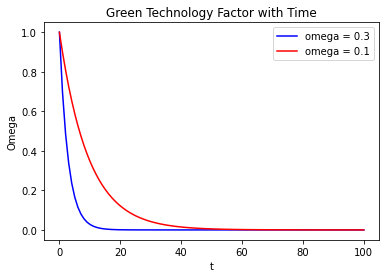

In [ ]:
# plot the relationship between abatement effort and efficiency of that effort

# define function
def green_technology_factor(omega:float):
    t = np.linspace(0, 100, num = 100) # theta is abatement effort
    Omega = (1-omega)**t
    return t, Omega

# set parameters
t, Omega1 = green_technology_factor(omega = 0.3) # omega is between 0 and 1
t, Omega2 = green_technology_factor(omega = 0.1)

# plot the relationship between unknowns
plt.plot(t, Omega1, 'b', label='omega = 0.3')
plt.plot(t, Omega2, 'r', label='omega = 0.1')
plt.legend()
plt.ylabel('Omega')
plt.xlabel('t')
plt.title('Green Technology Factor with Time')
plt.show()

**Student Answer**
(click into this cell and type your answer)

## Simulating emissions and capital evolution

We now simulate both capital growth and emissions. We do this in per-capita terms as discussed above. We also assume constant labour supply (no population growth). 

__Code-Guide__
1. define a python function with different parameters as input, producing a list of simulated values for variables of interest at discrete time points. In the function,
    - define the variables (arguments and parameters of the function)
    - write the rule, updating the outcome with time
    - output the list of time points and lists of updated (simulated) values

2. choose the values of the arguments of the function, and pass the output to naming variables
3. plot 

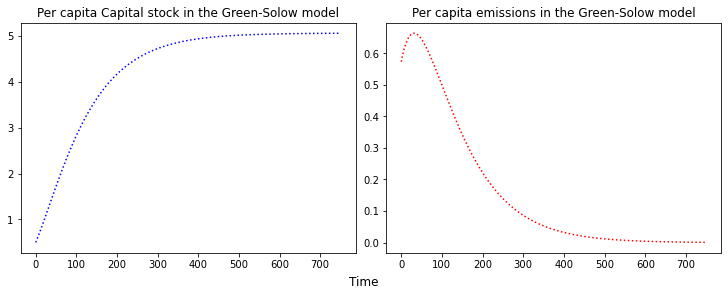

In [ ]:
## DISCRETE

# define functions
def simulate_capital_intensity_with_discrete_time(T, k0, A, a, s, d, theta, xi, omega):
    
    n = 0.00
    j = -0.002
    k = [k0]
    e = []
    
    t0 = 0
    timesteps = [t0]

    for t in range(T):
        F = A * k[t] ** a
        k.append(s* F * (1-theta) - (d-1-n)*k[t])

        Omega = (1-omega)**t
        e.append(F*Omega*(1-theta)**xi)    

        timesteps.append(t)

    return timesteps, k, e 

# choose values
t, k, e = simulate_capital_intensity_with_discrete_time(T=750, k0=0.5, A=1, a=0.5, s=0.05, d=0.02, theta=0.1, xi=2, omega=0.01)

# plot
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=False, constrained_layout=True, figsize=(10,4))

axes[0].plot(k, 'b:')
axes[0].set_title('Per capita Capital stock in the Green-Solow model')

axes[1].plot(e, 'r:')
axes[1].set_title('Per capita emissions in the Green-Solow model')

fig.supxlabel('Time')
plt.show()

**Student Task**
1. Explain the simulation above intuitively. 
2. Below, change the parameterisation in the following ways and intuitively explain how the simulation changes:
2.1. A government does invest only a small fraction of GDP into abatement
2.2. A country has a strong research focus in environmental technologies and are leading on the implementation of green technology
3. How are your simulations linked to the Environmental Kuznets Curve discussed in the lecture?

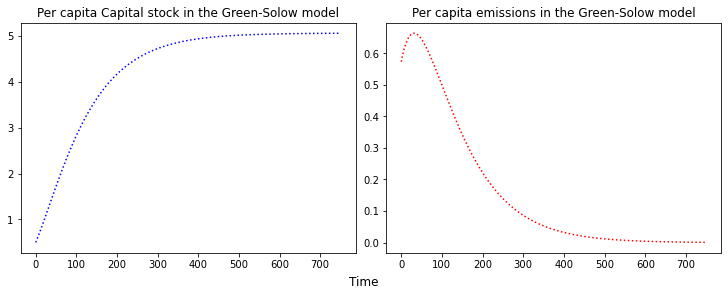

In [ ]:
## DISCRETE

# define functions
def simulate_capital_intensity_with_discrete_time(T, k0, A, a, s, d, theta, xi, omega):
    
    n = 0.00
    j = -0.002
    k = [k0]
    e = []
    
    t0 = 0
    timesteps = [t0]

    for t in range(T):
        F = A * k[t] ** a
        k.append(s* F * (1-theta) - (d-1-n)*k[t])

        Omega = (1-omega)**t
        e.append(F*Omega*(1-theta)**xi)    

        timesteps.append(t)

    return timesteps, k, e 

# choose values
t, k, e = simulate_capital_intensity_with_discrete_time(T=750, k0=0.5, A=1, a=0.5, s=0.05, d=0.02, theta=0.1, xi=2, omega=0.01)

# plot
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=False, constrained_layout=True, figsize=(10,4))

axes[0].plot(k, 'b:')
axes[0].set_title('Per capita Capital stock in the Green-Solow model')

axes[1].plot(e, 'r:')
axes[1].set_title('Per capita emissions in the Green-Solow model')

fig.supxlabel('Time')
plt.show()

**Student Answer**
(click into this cell and type your answer)

## Emissions versus concentrations of pollutants

In the simulations above, we simulated how emissions evolve over time. Responsible for climate change and global warming is however the concentration of pollutants in the athmospehere. In the following we add how the concentration of pollutants evolves. 

Suppose the concentration of pollutants at time $t$ is $C_t$, The concentration evolves over time in the following model: $$ C_{t+1} = \kappa C_t + E_t = kC_t + L_t \times e_t$$ 

Look at the following simulation:

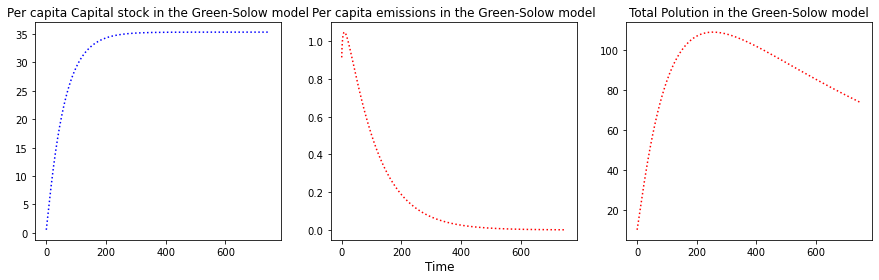

In [ ]:
# define functions
def simulate_capital_intensity(T, k0, C0, L0, A, a, s, d, theta, xi, omega, kappa):
    
    n = 0.0
    j = -0.002
    
    k = [k0]
    e = []
    C = [C0]
    L = [L0]

    t0 = 0
    timesteps = [t0]

    for t in range(T):
        F = A * k[t] ** a
        k.append(s* F * (1-theta) - (d-1-n)*k[t])
        
        Omega = (1-omega)**t
        e.append(F*Omega*(1-theta)**xi)

        L.append(L[t]*np.exp(n))
        
        C.append(kappa*C[t] + L[t]*e[t])     

        timesteps.append(t)

    return timesteps, k, e, C 

# choose values
t, k, e, C = simulate_capital_intensity(
    T=750, k0=0.5, C0=10, L0=1,  A=1, a=0.1, s=0.5, d=0.02, theta=0.01, xi=2, omega=0.01, kappa=0.999)

# plot
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=False, constrained_layout=False, figsize=(15,4))

axes[0].plot(k, 'b:')
axes[0].set_title('Per capita Capital stock in the Green-Solow model')
axes[1].plot(e, 'r:')
axes[1].set_title('Per capita emissions in the Green-Solow model')
axes[2].plot(C, 'r:')
axes[2].set_title('Total Polution in the Green-Solow model')

fig.supxlabel('Time')
plt.show()

**Student Task**
1. Explain the simulation above intuitively. How does the above simulation link to the idea of an environmental Kuznets curve?
2. Below, change the parameterisation in the following ways and intuitively explain how the simulation changes:
2.1. A government does invest only a small fraction of GDP into abatement
2.2. A country has a strong research focus in environmental technologies and are leading on the implementation of green technology
3. Can you simulate cases where emissions per capita increase, but total emissions do not? What does that mean concerning the impact on growth on the environment? 

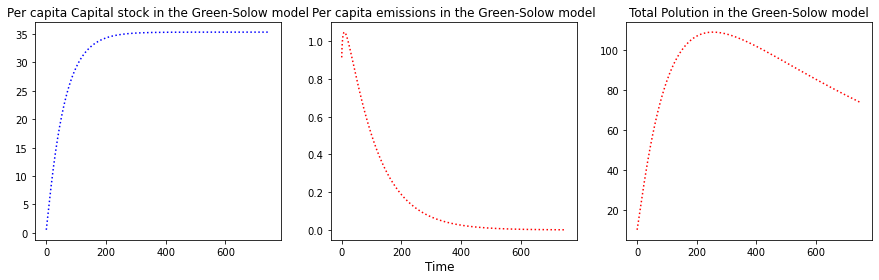

In [ ]:
# define functions
def simulate_capital_intensity(T, k0, C0, L0, A, a, s, d, theta, xi, omega, kappa):
    
    n = 0.0
    j = -0.002
    
    k = [k0]
    e = []
    C = [C0]
    L = [L0]

    t0 = 0
    timesteps = [t0]

    for t in range(T):
        F = A * k[t] ** a
        k.append(s* F * (1-theta) - (d-1-n)*k[t])
        
        Omega = (1-omega)**t
        e.append(F*Omega*(1-theta)**xi)

        L.append(L[t]*np.exp(n))
        
        C.append(kappa*C[t] + L[t]*e[t])     

        timesteps.append(t)

    return timesteps, k, e, C 

# choose values
t, k, e, C = simulate_capital_intensity(
    T=750, k0=0.5, C0=10, L0=1,  A=1, a=0.1, s=0.5, d=0.02, theta=0.01, xi=2, omega=0.01, kappa=0.999)

# plot
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=False, constrained_layout=False, figsize=(15,4))

axes[0].plot(k, 'b:')
axes[0].set_title('Per capita Capital stock in the Green-Solow model')
axes[1].plot(e, 'r:')
axes[1].set_title('Per capita emissions in the Green-Solow model')
axes[2].plot(C, 'r:')
axes[2].set_title('Total Polution in the Green-Solow model')

fig.supxlabel('Time')
plt.show()

**Student Answer**
(click into this cell and type your answer)